In [1]:
import numpy as np
import math as m
import sklearn as sk
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
X,y = make_moons(n_samples=2000, shuffle=True, noise =0.03)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1000, train_size=1000, shuffle=True)

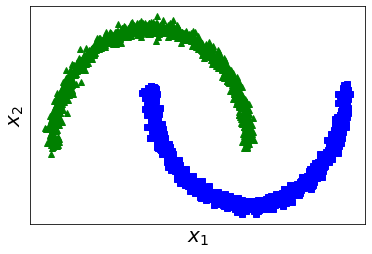

In [3]:

plt.plot(X[:, 0][y==1], X[:, 1][y==1],'bs')
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'g^')

# X contains two features, x1 and x2
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)

# Simplifying the plot by removing the axis scales.
plt.xticks([])
plt.yticks([])

# Displaying the plot.
plt.show()

In [4]:
def accuracy(y,pred):
    n=0
    for i in range(len(y)):
        if y[i]==pred[i]:
            n+=1
    return n/len(y)

In [5]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=200)
neigh.fit(X_train, y_train)
pred = neigh.predict(X_test)
accuracy(y_test,pred)


0.99

In [6]:
# random forest
from sklearn.ensemble import RandomForestClassifier

neigh = RandomForestClassifier(n_estimators=200)
neigh.fit(X_train, y_train)
X2,y2 = make_moons(n_samples=1000, shuffle=True, noise =0.03)
pred = neigh.predict(X_test)
accuracy(y_test,pred)

0.998

In [7]:
# SVM
from sklearn.svm import SVC

neigh = SVC()
neigh.fit(X_train, y_train)
pred = neigh.predict(X_test)
accuracy(y_test,pred)

1.0

#On utilise la fonction predict de sklearn pour prédire la classe pour toute donnée


In [104]:
def SL(X,a0,a1,n): # fonctionnement mais à verifier
    X= X.reshape(-1)
    d = X.shape[0]
    # distribution gaussienne centrée réduite de taille n*d
    Z1 = np.random.normal(0,1,(n,d))
    #normalisé par la norme de chacun des Zi
    Z2 = Z1 / np.linalg.norm(Z1,axis=1).reshape(-1,1)
    #uniforme sur [a0**d,a1**d]
    u = np.random.uniform(a0**d,a1**d,(n,1))
    u2 = u/u**d
    #projection sur l'hyperplan et translation
    S = X + Z2*u 
    return S

# algorithme growing spheres generation à finir 
def algo_GSG(X,y,classifier,eta,n): 

    d = X.shape[0]
    z = SL(X,0,eta,n)
    prediction = classifier.predict(z)
    while True:
        if prediction.all() == y:
            print("ok")
            break
        else:
            eta = eta/2
            z = SL(X,0,eta,n)
            prediction = classifier.predict(z)
            print(prediction)
    print("hi",prediction)
    
    a0 = eta
    a1 = 2*eta
    while True:
        if prediction.any() != y:
            print("ok2")
            break
        else:
            a0 = a1
            a1 = a1+eta
            z = SL(X,a0,a1,n)
            prediction = classifier.predict(z)
            print("hi2", prediction)
    
    y2 = np.ones((n))*y
    enemys= np.argwhere(prediction!=y2)
    print(enemys)
    for i in enemys:
        print(classifier.predict(z[i,:]))
    enemy = m.inf
    for i in enemys:
        if np.linalg.norm(z[i]-X) < enemy:
            enemy = np.linalg.norm(z[i]-X)
            ene = z[i,:]
            #print(ene)
            #print(y)
            #print(classifier.predict(z[i,:]))   


    return ene



(2,)
0
ok
hi [0 0 0 0 0 0 0 0 0 0]
hi2 [1 1 0 1 1 0 0 1 0 1]
ok2
[[0]
 [1]
 [3]
 [4]
 [7]
 [9]]
[1]
[1]
[1]
[1]
[1]
[1]


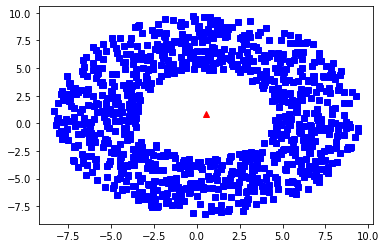

In [105]:
x0= X_test[0]
print(x0.shape)
f = SL(x0,2,3,1000)
plt.plot(f[:,0],f[:,1],'bs')
plt.plot(x0[0],x0[1],'r^')
plt.show

print(y_test[2])
enemy =algo_GSG(X_test[3],y_test[3],neigh,0.5,10)


In [106]:
def GSFS(X,y,classifier,enemy):
    e = enemy
    e_best=e
    while classifier.predict(e) != y:
        e_best = e
        i = np.argmin(np.linalg.norm(e-X, ord=1))
        print("hi")
        e[i]= X[i]
    
    return e_best

In [107]:
print(GSFS(X_test[3],y_test[3],neigh,enemy))

hi
[[0.98440723 0.98440723]]


In [109]:
print(y_test[3])
print(neigh.predict(enemy.reshape(1,-1)))

0
[0]
